# Data Science
#### By: Overpower Gore
[license-badge]: https://img.shields.io/badge/License-CC-orange
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en




In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Part I: Simpler Linear Regression. Knowing data

Data source [0].

<h1>Table of contents</h1>

<div class="alert  alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#unData">Data</a></li>
         <ol>
             <li><a href="#reData">Reading</a></li>
             <li><a href="#exData">Exploration</a></li>
         </ol>
        <li><a href="#daExploration">Data Exploration</a></li>
        <li><a href="#simRegression">Simple Regression Model</a></li>
    </ol>
</div>
<br>
<hr>


<h2 id="unData">Data</h2>

### `titanic3.csv`:

This dataset contains a model-specific fuel consumption ratings and estimated carbon dioxide 
emissions for new light-duty vehicles for retail sale in Canada.

Some **features** are

- **survived** e.g. 1 or 0


In [6]:
df = pd.read_csv("titanic3.csv")

In [7]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
df.shape

(1309, 14)

In [9]:
print("Number of rows =", df.shape[0], "\nNumber of features (columns) =",df.shape[1])

Number of rows = 1309 
Number of features (columns) = 14


In [10]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.head(7)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
5  48.00      0      0   19952   26.5500      E12        S    3    NaN   
6  63.00      1      0   13502   77.9583       D7        S   10    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY

In [13]:
df.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

## Querying

Note, pandas considers a table (dataframe) as a pasting of many "series" together, horizontally.

In [14]:
type(df.survived), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [15]:
df.survived == 1

0        True
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

In [16]:
df.mean(axis = 0)

#it is important to see that these values are the same as those seen in describe. Seeing the values in describe for mean
# And the values shown using mean() confirms that these 2 values truly represents the average

pclass        2.294882
survived      0.381971
age          29.881138
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
dtype: float64

In [17]:
df.median(axis = 0)

pclass        3.0000
survived      0.0000
age          28.0000
sibsp         0.0000
parch         0.0000
fare         14.4542
body        155.0000
dtype: float64

In [18]:
df.sum(axis = 0)
#it is interesting to see that it recoognises that strings can't be added therefore, they remain as string ang are shown in a line

pclass                                                   3004
survived                                                  500
name        Allen, Miss. Elisabeth WaltonAllison, Master. ...
sex         femalemalefemalemalefemalemalefemalemalefemale...
age                                                   31255.7
sibsp                                                     653
parch                                                     504
ticket      2416011378111378111378111378119952135021120501...
fare                                                  43550.5
body                                                    19458
dtype: object

In [19]:
df.count(axis = 0)

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

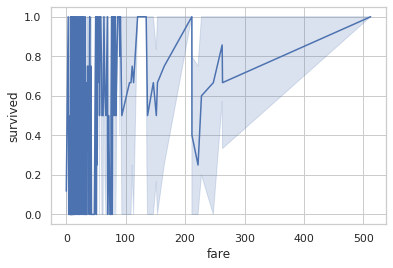

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

sns.lineplot(data=df, x="fare", y="survived")

##  Exercises

1. Use at least four more features and calculate: average, mean, median, sum, and implement at least three more statistics functions. Check the ```numpy``` documentation. Different to previous implementations.
1. Implement a new different Library, such as ```seaborn```
1. Submmit your report in Moodle. Template https://www.overleaf.com/read/xqcnnnrsspcp

## Versions

In [3]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.7.4
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


# References

[0] data https://tinyurl.com/2m3vr2xp

[1] numpy https://numpy.org/

[2] scipy https://docs.scipy.org/

[3] matplotlib https://matplotlib.org/

[4] matplotlib.cm https://matplotlib.org/stable/api/cm_api.html

[5] matplotlib.pyplot https://matplotlib.org/stable/api/pyplot_summary.html

[6] pandas https://pandas.pydata.org/docs/

[7] seaborn https://seaborn.pydata.org/
